Aquesta base de dades recull les diferents accions de seguiment que ha rebut la persona

En aquest cas hem creat la columna:

a.	**Quantitat de seguiments** on hem recollit el nombre de seguiments que ha rebut la persona.


In [1]:
import pandas as pd

In [2]:
df=pd.read_csv ('Seguiments.csv',encoding='utf-8',sep=';')
df_i=df
df_dic=pd.read_csv('Dict.csv',encoding='utf-8',sep=',')

In [3]:
df=df[['Tipus','Durada (en minuts)','Participants','Persona.1','Canal de gestió','Projecte','Àmbit','Estat']]
df.head()

,Tipus,Durada (en minuts),Participants,Persona.1,Canal de gestió,Projecte,Àmbit,Estat
0,Tramitació,20.0,Família,608d79c8-45a4-8ef8-7ef7-5bb4a0cc3130,Telèfon,Acompanyament a famílies,NaN,Realitzat
1,Entrevista inicial,60.0,Persona atesa,14d55c40-355c-dd4c-4459-5e0dc50e2155,NaN,NaN,NaN,Derivat a
2,Tramitació,45.0,Persona atesa,505fc9eb-9f43-7354-1df5-5bb4a039c663,Presencial a l'entitat,Acompanyament a la Persona amb Sordesa,NaN,Realitzat
3,Altres,5.0,Persona atesa,5c7050e6-4049-2055-0cef-5f83361fa157,Correu electrònic,Acompanyament a la Persona amb Sordesa,NaN,Realitzat
4,Tramitació,5.0,Família,217ec157-74cd-8caf-664c-5f06d2bbc38b,Correu electrònic,Acompanyament a famílies,NaN,Realitzat


In [4]:
#cambiar nombre Persona.1 a ID
df.rename(columns={'Persona.1':'ID'},inplace=True)

/tmp/ipykernel_13674/4002328447.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={'Persona.1':'ID'},inplace=True)


In [5]:
df['ID'] = df['ID'].map(df_dic.set_index('ID')['IDN'])
df.head()

/tmp/ipykernel_13674/1252908069.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ID'] = df['ID'].map(df_dic.set_index('ID')['IDN'])


,Tipus,Durada (en minuts),Participants,ID,Canal de gestió,Projecte,Àmbit,Estat
0,Tramitació,20.0,Família,608d79c8-45a4-8ef8-7ef7-5bb4a0cc3130,Telèfon,Acompanyament a famílies,NaN,Realitzat
1,Entrevista inicial,60.0,Persona atesa,14d55c40-355c-dd4c-4459-5e0dc50e2155,NaN,NaN,NaN,Derivat a
2,Tramitació,45.0,Persona atesa,505fc9eb-9f43-7354-1df5-5bb4a039c663,Presencial a l'entitat,Acompanyament a la Persona amb Sordesa,NaN,Realitzat
3,Altres,5.0,Persona atesa,5c7050e6-4049-2055-0cef-5f83361fa157,Correu electrònic,Acompanyament a la Persona amb Sordesa,NaN,Realitzat
4,Tramitació,5.0,Família,217ec157-74cd-8caf-664c-5f06d2bbc38b,Correu electrònic,Acompanyament a famílies,NaN,Realitzat


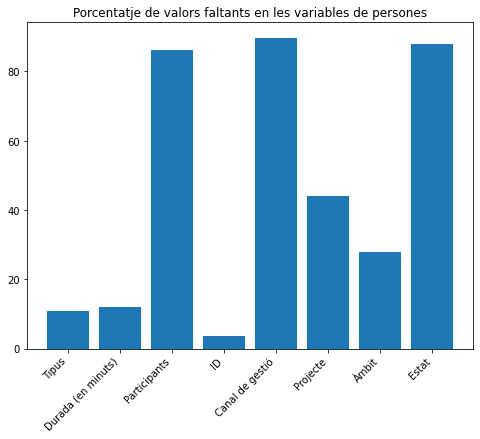

In [6]:
#ver porcentaje de nans por columna
df.isnull().sum()/df.shape[0]*100
#graficar porcentaje de nans
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
df.isnull().sum()/df.shape[0]*100
plt.bar(df.columns,df.isnull().sum()/df.shape[0]*100)
plt.xticks(rotation=45, ha='right')
plt.title('Porcentatje de valors faltants en les variables de persones')
plt.show()

In [7]:
(df['Durada (en minuts)'] == 0).sum()/df.shape[0]*100


59.78062157221207

In [8]:
df=df[['ID','Tipus']]
df.head()

,ID,Tipus
0,608d79c8-45a4-8ef8-7ef7-5bb4a0cc3130,Tramitació
1,14d55c40-355c-dd4c-4459-5e0dc50e2155,Entrevista inicial
2,505fc9eb-9f43-7354-1df5-5bb4a039c663,Tramitació
3,5c7050e6-4049-2055-0cef-5f83361fa157,Altres
4,217ec157-74cd-8caf-664c-5f06d2bbc38b,Tramitació


In [9]:
#crear columna con cantidad de sesiones por ID
counts = df['ID'].value_counts()
df['Quantitat seguiments'] = df['ID'].map(counts)
df.head()

,ID,Tipus,Quantitat seguiments
0,608d79c8-45a4-8ef8-7ef7-5bb4a0cc3130,Tramitació,1.0
1,14d55c40-355c-dd4c-4459-5e0dc50e2155,Entrevista inicial,28.0
2,505fc9eb-9f43-7354-1df5-5bb4a039c663,Tramitació,3.0
3,5c7050e6-4049-2055-0cef-5f83361fa157,Altres,7.0
4,217ec157-74cd-8caf-664c-5f06d2bbc38b,Tramitació,6.0


In [10]:
df=df[['ID','Quantitat seguiments']]
df.head()

,ID,Quantitat seguiments
0,608d79c8-45a4-8ef8-7ef7-5bb4a0cc3130,1.0
1,14d55c40-355c-dd4c-4459-5e0dc50e2155,28.0
2,505fc9eb-9f43-7354-1df5-5bb4a039c663,3.0
3,5c7050e6-4049-2055-0cef-5f83361fa157,7.0
4,217ec157-74cd-8caf-664c-5f06d2bbc38b,6.0


In [11]:
#eliminar dupicados por ID
df.drop_duplicates(subset='ID',keep='first',inplace=True)
df.head()

,ID,Quantitat seguiments
0,608d79c8-45a4-8ef8-7ef7-5bb4a0cc3130,1.0
1,14d55c40-355c-dd4c-4459-5e0dc50e2155,28.0
2,505fc9eb-9f43-7354-1df5-5bb4a039c663,3.0
3,5c7050e6-4049-2055-0cef-5f83361fa157,7.0
4,217ec157-74cd-8caf-664c-5f06d2bbc38b,6.0


In [12]:
df.isnull().sum()

ID                      1
Quantitat seguiments    1
dtype: int64

In [13]:
#eliminar nulls en la columna ID
df.dropna(subset=['ID'],inplace=True)

In [16]:
#pasar df a csv
df.to_csv ('Seguiments_final.csv',index=False,encoding='utf-8')